In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression


In [10]:
X, y, coef = make_regression(n_samples=200, n_features=10, n_targets=1, 
                      coef=True, random_state=0)

In [19]:
##### make two features completely similar (0 and 1)
X.shape

(200, 10)

In [23]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.094192,0.289121,0.412871,0.441033,-0.799422,-0.198399,-1.147611,-0.358114,0.178793,0.240788
1,-0.821535,0.215553,0.568007,0.319118,-1.638424,0.082611,0.018922,-0.082034,0.307265,-1.776389
2,-1.838847,0.604137,-1.629584,-0.983118,0.802052,-2.121176,1.966764,-0.196234,-0.898322,-1.846532
3,1.435049,-0.074668,0.258716,0.365849,0.481115,0.275601,0.507239,-0.116230,1.297825,2.759355
4,0.462782,0.177426,-0.401781,-0.672460,-0.813146,-1.630198,-0.907298,0.051945,-0.359553,-1.726283


In [24]:
#### copy values from 0 col to 1 col
for i in range(len(X)):
    X[i,1] = X[i,0]

In [25]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.094192,0.094192,0.412871,0.441033,-0.799422,-0.198399,-1.147611,-0.358114,0.178793,0.240788
1,-0.821535,-0.821535,0.568007,0.319118,-1.638424,0.082611,0.018922,-0.082034,0.307265,-1.776389
2,-1.838847,-1.838847,-1.629584,-0.983118,0.802052,-2.121176,1.966764,-0.196234,-0.898322,-1.846532
3,1.435049,1.435049,0.258716,0.365849,0.481115,0.275601,0.507239,-0.116230,1.297825,2.759355
4,0.462782,0.462782,-0.401781,-0.672460,-0.813146,-1.630198,-0.907298,0.051945,-0.359553,-1.726283


In [26]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [27]:
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)

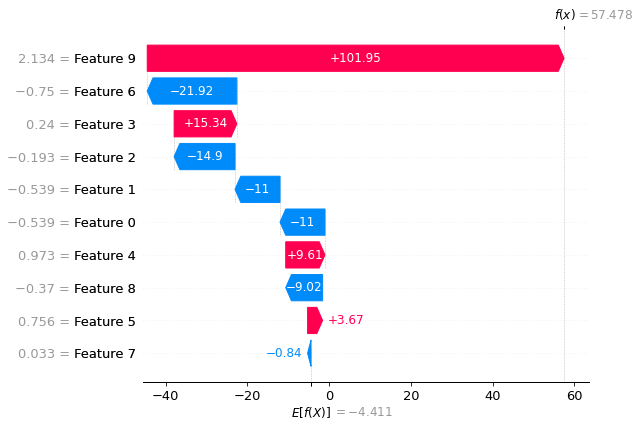

In [28]:
sample = 5
shap.plots.waterfall(shap_values[sample], max_display=14)

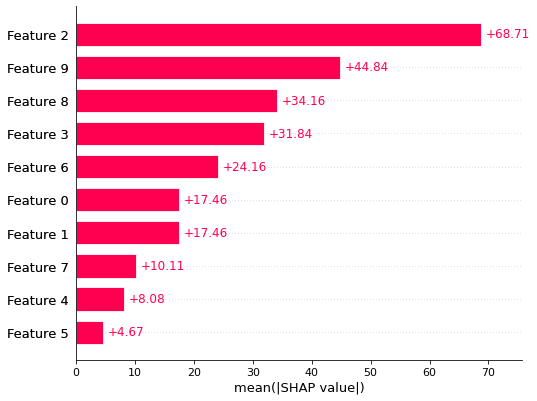

In [29]:
shap.plots.bar(shap_values, max_display=11)

$$\phi_i = \frac{1}{|F|!} \sum_{S \subset F\text{\ }\{i\} } (val(S \cup \{i\}) - val(S))$$